In [2]:
# word pair encoding
import os
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def rmsword(corpus, stopwords):
    '''remove stopwords from corpus'''
    return [word for word in corpus if word not in stopwords]

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g
    
def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def ctwp(corpus, wds=1):
    '''count close word frequencies for corpus (tokenized) at distance wds'''
    res = {}
    for i in range(wds, len(corpus)-wds):
        if corpus[i-wds] == corpus[i] or corpus[i+wds] == corpus[i]:
            try:
                res[corpus[i]] += 1
            except KeyError:
                res[corpus[i]] = 1
    return res

def frqprsd(corpus, wds=1):
    '''find the most frequent word pairs at the given distance'''
    res = {}
    for it0 in range(len(corpus)): # first token
        for it1 in [max(it0-wds,0),min(it0+wds,len(corpus)-1)]:
            if it0 != it1:
                try:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] += 1
                except KeyError:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] = 1
    return res  

def frqprsw(corpus, wds=1):
    '''find the most frequent word pairs inside the given distance'''
    res = {}
    for it0 in range(len(corpus)): # first token
        for it1 in range(max(it0-wds,0),min(it0+wds,len(corpus)-1)):
            if it0 != it1:
                try:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] += 1
                except KeyError:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] = 1
    return res   

def main():
    os.chdir(r'D:\BernieData\DeepL\lrgtxt0')
    f = open('Proktols of Neptune.txt', encoding="utf-8")
    text = []
    for piece in read_in_chunks(f):
        process_data(piece, text)
    corpus = preprocess_string(' '.join(text))
    dct = corpora.Dictionary([corpus])  # initialize a Dictionary
    # tokenize text
    corptzd = [dct.token2id[x] for x in corpus] # tokenized corpus
    #print(ctwp(corptzd, 1))
    #print(dct.keys())
    #fw = frqprsd(corptzd, 1)
    #print(fw)
    
    for niter in range(100):
        # find most frequent pairs
        fwd = frqprsw(corptzd, 5+niter)
        fl = []
        for fel in fwd.items():
            if fel[1] > 5+niter:
                fl.append(fel)
        fl.sort(reverse=True, key=lambda el: el[1])
        #print(fl)
        #print(len(dct.items()))

        splitfel = []
        felrem = []
        felremw = []
        # replace words with a concat token e.g. w0_w1
        for fel in fl:
            thisrml = fel[0].split('_')
            splitfel.append(thisrml)
            felrem += thisrml[0] + thisrml[1]
            i0 = corptzd.index(int(thisrml[0]))
            i1 = corptzd.index(int(thisrml[1]))
            if (i1 - i0) <= (5+niter):
                corptzd.pop(i1) # remove original pairs from corpus
                corptzd.pop(i0)
                dct.add_documents([[fel[0]]])
                corptzd.insert(i0, dct.token2id[fel[0]]) # add new paired token
                felremw.append((dct[int(thisrml[0])], dct[int(thisrml[1])]))
        #print(splitfel)

        #corptzd = [x for x in corptzd if x not in felrem]
        #print(corptzd[:20])
        #print(list(dct.items())[:20])
        #print(dct[605])
        #corpus = [dct[x] for x in corptzd] # reconstruct corpus
        #print(corpus[:50])
        #dct.filter_tokens(bad_ids=felrem)
        #dct.compactify()
        #corptzd = [dct.token2id[x] for x in corpus] # tokenize corpus again
        #print(corptzd)
        #print(felremw)
    corpus = [dct[x] for x in corptzd] # reconstruct corpus
    print(corpus[:100])
    
    for wrd in corpus:
        if wrd.find('_') > 0:
            thisrml = wrd.split('_')
            print(dct[int(thisrml[0])], dct[int(thisrml[1])])
    
    
if __name__=='__main__':
    main()

['henri', 'hass', 'rumor', 'spun', 'wild', 'tale', 'horror', 'neptun', 'legendari', 'race', 'rumor', 'hideou', 'realiti', 'captain', 'captiv', 'crew', 'transcrib', 'note', 'etext', 'produc', 'planet', 'stori', 'summer', 'extens', 'research', 'uncov', 'evid', 'copyright', 'public', 'renew', '223_680', 'bafflement', 'board', 'patrol', '1096_1159', 'deflector', 'needl', 'gyrat', 'wildli', 'begun', 'minut', 'ago', 'lip', 'tighten', 'irrit', 'mate', 'peer', 'inquisit', 'shoulder', 'better', 'check', 'cours', 'sir', 'point', 'perfect', 'slightest', 'aberr', '680_223', 'breath', 'figur', 'object', 'dead', 'ahead', 'caus', 'disturb', 'deflector', 'beam', 'shunt', 'pivot', 'pace', 'control', 'room', 'fix', 'steadili', 'visipanel', 'mere', 'shook', '592_692', 'panel', 'magnifi', 'cours', 'sharpest', 'patrol', 'damn', 'bit', '680_737', 'stare', 'crazi', 'needl', 'jump', 'bear', '317_109', 'cut', 'jet', 'better', 'drift', 'better', 'abl', 'determin', 'wrong']
command janu
ship space
janu command
h

In [1]:
# binomial sampling example
import random
import math
import numpy as np

def binom(n,k,p):
    '''binomial distribution'''
    return math.factorial(n) / math.factorial(n-k) / math.factorial(k) * p**k * (1-p)**(n-k)

def binomcf(n,k,p):
    '''binomial distribution cumulative'''
    return sum([binom(n,i,p) for i in range(k)])

def binsmpl(n,k,p):
    '''return a sample from a binomial distribution'''
    ui = random.random() # continuous [0,1]
    klow = 0
    while klow < 1000: # just to be safe
        if binomcf(n,klow,p)<ui and ui<binomcf(n,klow+1,p): # todo: tables for performance
            return klow
        klow += 1
    
def main():
    #print(binom(6,4,0.3))
    avrg = 0.
    for i in range(1000):
        #print(binsmpl(6,4,0.3))
        avrg += binsmpl(6,4,0.3)
    print(avrg/1000)
    print(np.average(np.random.binomial(6, 0.3, 1000)))
    
if __name__=='__main__':
    main()    

1.806
1.798


In [1]:
# truncatable primes
# A truncatable prime is a prime number that when you successively
# remove digits from one end of the prime, you are left with a new prime number.
def primes(n):
    multiples = set()
    prime = []
    for i in range(2, n+1):
        if i not in multiples:
            prime.append(i)
            multiples.update(set(range(i*i, n+1, i)))
    return prime

def truncp(n):
    '''find l+r truncatable primes up to n'''
    pl = primes(n)
    pl.sort(reverse=True)
    res = []
    mxpl = 0
    mxpr = 0
    for cp in pl:
        if mxpl == 0:
            cpllr = [int(str(cp)[i:]) for i in range(len(str(cp)))]
            istrp = True
            for cpl in cpllr:
                if pl.count(cpl) == 0:
                    istrp = False
                    break
            if istrp:
                mxpl = cp
        if mxpr == 0:
            cpllr = [int(str(cp)[:i]) for i in range(len(str(cp)),0,-1)]
            istrp = True
            for cpr in cpllr:
                if pl.count(cpr) == 0:
                    istrp = False
                    break
            if istrp:
                mxpr = cp
        if mxpl>0 and mxpr>0:
            return (mxpl, mxpr)  
    return (mxpl, mxpr)

# largest left-truncatable and right-truncatable primes less than one million (base 10 is implied).
def main():
    print(truncp(1000000))
    
if __name__=='__main__':
    main()

(999907, 739399)


In [1]:
cp = 1234
#[int(str(cp)[i:]) for i in range(len(str(cp)))]
[int(str(cp)[:i]) for i in range(len(str(cp)),0,-1)]

[1234, 123, 12, 1]

In [23]:
from numba import jit # https://numba.pydata.org/
import random

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

def main():
    print(monte_carlo_pi(10000))
    
if __name__=='__main__':
    main()

3.1132


### Numba

careful: does not work well with Pandas -> test preprocessing, clean data, then deploy numba for performance-intensive parts

In [24]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.3666656017303467
Elapsed (after compilation) = 0.0


In [2]:
# finance data sites
# https://db.nomics.world/
# https://github.com/addisonlynch/iexfinance
# Useful Collection of Forecasts: http://www.forecasts.org/stpoor.htm
# Massive Collection of Indicators: https://www.assetmacro.com/
# Labor Statistics: https://www.bls.gov/
# Data from the US Treasury: https://home.treasury.gov/

ticker = 'AMD'
timeframe = '1y'
df = p.chartDF(ticker, timeframe)
df = df[['close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
df.dropna(inplace=True) # dropna() will remove all NaN entries from our dataframe

df.fillna(df.mean(), inplace=True) # fillna() will replace NaN entries with the desired argument

sns.pairplot(data=df, hue="asset_price")

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X1,Y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) #print 5 best features

sel_feature = ['P/E','Debt','Revenue'] # Select features
X1 = df1[sel_feature].values
Y1 = df1['math score'].values
Y1 = Y1.flatten()
X_scale1 = scale(X1)

NameError: name 'p' is not defined

In [9]:
# another attention test
import numpy as np

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

enc_hidd_st = np.array([[0,1,1], [5,0,1], [1,1,0], [0,5,1]])
dec_hid_st = np.array([[10, 5, 10]])

scores = np.dot(enc_hidd_st, dec_hid_st.T)
sm_scores = softmax(scores)
ctx_vec = enc_hidd_st * sm_scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

context vector:  [[5.00000000e+00 6.94397194e-11 1.00000000e+00]]


In [6]:
# some webscraper
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

headers = ({'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
sapo = "https://casa.sapo.pt/Venda/Apartamentos/?sa=11&or=10"
response = get(sapo, headers=headers)

titles = []
created = []
prices = []
areas = []
zone = []
condition = []
descriptions = []
urls = []
thumbnails = []

n_pages = 0
for page in range(0,900):
    n_pages += 1
    sapo_url = 'https://casa.sapo.pt/Venda/Apartamentos/?sa=11&lp=10000&or=10'+'&pn='+str(page)
    r = get(sapo_url, headers=headers)
    page_html = BeautifulSoup(r.text, 'html.parser')
    house_containers = page_html.find_all('div', class_="searchResultProperty")
    if house_containers != []:
        for container in house_containers:
            # Price
            price = container.find_all('span')[2].text
            if price == 'Contacte Anunciante':
                price = container.find_all('span')[3].text
                if price.find('/') != -1:
                    price = price[0:price.find('/')-1]
            if price.find('/') != -1:
                price = price[0:price.find('/')-1]
            price_ = [int(price[s]) for s in range(0,len(price)) if price[s].isdigit()]
            price = ''
            for x in price_:
                price = price+str(x)
            prices.append(int(price))
            # Zone
            location = container.find_all('p', class_="searchPropertyLocation")[0].text
            location = location[7:location.find(',')]
            zone.append(location)
            # Title
            name = container.find_all('span')[0].text
            titles.append(name)
            # Status
            status = container.find_all('p')[5].text
            condition.append(status)
            # Area
            m2 = container.find_all('p')[9].text
            if m2 != '-':
                m2 = m2.replace('\xa0','')
                m2 = float("".join(itertools.takewhile(str.isdigit, m2)))
                areas.append(m2)
            else:
                m2 = container.find_all('p')[7].text
                if m2 != '-':
                    m2 = m2.replace('\xa0','')
                    m2 = float("".join(itertools.takewhile(str.isdigit, m2)))
                    areas.append(m2)
                else:
                    areas.append(m2)
            # Creation date
            date = pd.to_datetime(container.find_all('div', class_="searchPropertyDate")[0].text[21:31])
            created.append(date)
            # Description
            desc = container.find_all('p', class_="searchPropertyDescription")[0].text[7:-6]
            descriptions.append(desc)
            # url
            link = 'https://casa.sapo.pt/' + container.find_all('a')[0].get('href')[1:-6]
            urls.append(link)

            # image
            img = str(container.find_all('img')[0])
            img = img[img.find('data-original_2x=')+18:img.find('id=')-2]
            thumbnails.append(img)
    else:
        break
                                  
    sleep(randint(1,2))
print('You scraped {} pages containing {} properties.'.format(n_pages, len(titles)))

IndexError: list index out of range

In [1]:
# yet another attention test
import numpy as np

def softmax(x):
    '''softmax applied to set of values x'''
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def posscr(x, w):
    '''position score via weights'''
    return np.dot(x, w)

def addconc(eh, dh, wed, wc):
    '''additive and concat score'''
    return np.dot(np.dot(wed, np.concatenate((eh, dh), axis=0)), wc.T)

enc_hidd_st = np.array([[0,1,1], [5,0,1], [1,1,0], [0,5,1]])
dec_hid_st = np.array([[10, 5, 10]])

scores_v = np.dot(enc_hidd_st, dec_hid_st.T)
#scores = softmax(scores_v)
scores = posscr(scores_v, np.array([[.1, 0, .1]]))
ctx_vec = enc_hidd_st * scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

print('add/concat: ', addconc(enc_hidd_st, dec_hid_st, np.array([[0,1,0,0,1]]), np.array([[1,1,1]])))

context vector:  [[31.5  0.  11. ]]
add/concat:  [[31]]


In [1]:
# queens
import random

def rddraw(l):
    return random.sample(l, len(l))

def haspr(l):
    lel = l[0]
    for i in range(1,len(l)):
        if l[i] == lel and lel == 1:
            return True
        lel = l[i]
    return False

def main():
    #print(rddraw([0,0,1,1]))
    #print(haspr(rddraw([0,0,1,1])))
    qc = 0
    for i in range(10000):
        if haspr(rddraw([0,0,1,1])):
            qc += 1
    print(qc/100)
    
if __name__=='__main__':
    main()

50.38


In [1]:
# dice game
import random

def thrwdc(nf):
    '''throw a dice with nf faces'''
    return random.randint(1,nf)

def smndc(nf, n):
    '''throw n dice with nf faces and return sum'''
    return sum([thrwdc(nf) for x in range(n)])

def main():
    #print(smndc(6,6))
    ngms = 100000
    p0w = 0
    for i in range(ngms):
        if smndc(4, 9) > smndc(6, 6):
            p0w += 1
    print(p0w/ngms)
    p0w = 0
    for i in range(ngms):
        if smndc(10, 5) > smndc(7, 6):
            p0w += 1
    print(p0w/ngms)
    
if __name__=='__main__':
    main()

0.57427
0.6436


In [4]:
from collections import defaultdict
 
costs  = {'W': {'A': 16, 'B': 16, 'C': 13, 'D': 22, 'E': 17},
          'X': {'A': 14, 'B': 14, 'C': 13, 'D': 19, 'E': 15},
          'Y': {'A': 19, 'B': 19, 'C': 20, 'D': 23, 'E': 50},
          'Z': {'A': 50, 'B': 12, 'C': 50, 'D': 15, 'E': 11}}
demand = {'A': 30, 'B': 20, 'C': 70, 'D': 30, 'E': 60}
cols = sorted(demand.iterkeys())
supply = {'W': 50, 'X': 60, 'Y': 50, 'Z': 50}
res = dict((k, defaultdict(int)) for k in costs)
g = {}
for x in supply:
    g[x] = sorted(costs[x].iterkeys(), key=lambda g: costs[x][g])
for x in demand:
    g[x] = sorted(costs.iterkeys(), key=lambda g: costs[g][x])
 
while g:
    d = {}
    for x in demand:
        d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
    s = {}
    for x in supply:
        s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
    f = max(d, key=lambda n: d[n])
    t = max(s, key=lambda n: s[n])
    t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
    v = min(supply[f], demand[t])
    res[f][t] += v
    demand[t] -= v
    if demand[t] == 0:
        for k, n in supply.iteritems():
            if n != 0:
                g[k].remove(t)
        del g[t]
        del demand[t]
    supply[f] -= v
    if supply[f] == 0:
        for k, n in demand.iteritems():
            if n != 0:
                g[k].remove(f)
        del g[f]
        del supply[f]
 
for n in cols:
    print ("\t", n,)
print()
cost = 0
for g in sorted(costs):
    print (g, "\t",)
    for n in cols:
        y = res[g][n]
        if y != 0:
            print (y,)
        cost += y * costs[g][n]
        print ("\t",)
    print()
print ("\n\nTotal Cost = ", cost)

AttributeError: 'dict' object has no attribute 'iterkeys'

In [2]:
# test staged embedding schema: words -> tokens -> segment -> position
text = "Hello,How,Are,You,Today"
tokens = text.split(',')
print ('.'.join(tokens))

Hello.How.Are.You.Today


0 1.0003120086847672
100 0.9735266269437588
[0.36248617 0.33856622]
w1


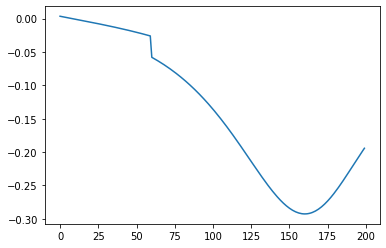

w2


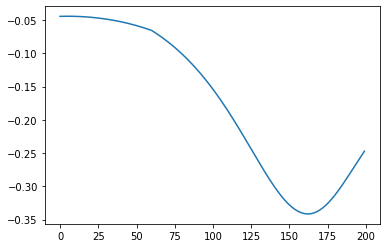

In [47]:
# simple NN iteration test
import numpy as np
import matplotlib.pyplot as plt
import random

modeldim = 2
nshown = 2
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 2, modeldim

inpt = np.ones(modeldim) # input
y = range(D_out) # truth

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.01
w2 = np.random.randn(H, D_out)*0.01

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
yw1 = []
yw2 = []

learning_rate = 1e-2

for t in range(200):
    # Forward pass: compute predicted y
    h = np.dot(inpt, w1) + b1
    h_relu = np.maximum(h, 0)
    y_pred = np.dot(h_relu, w2) + b2

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(grad_y_pred, y_pred, y)
    grad_w2 = np.dot(grad_y_pred.T, h_relu).T # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    grad_w1 = np.dot(inpt.T, grad_h)
    #print(np.shape(w2))
    #print(np.shape(grad_y_pred))
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1.T[0]
    b2 -= learning_rate * grad_b2[0]
    #for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        #mem += dparam * dparam
        #param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    yw1.append(np.sum(grad_w1))
    yw2.append(np.sum(grad_w2))
        
print(y_pred)
x = range(len(yw1))
print('w1')
plt.plot(x, yw1)
plt.show()
print('w2')
plt.plot(x, yw2)
plt.show()